In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report, auc
import xgboost as xgb

In [2]:
# Loading the dataset
df = pd.read_csv("HeartDisease_Patients.csv")


In [3]:
# Exploratory Data Analysis
df.info()
df.isnull().sum()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   gender    1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


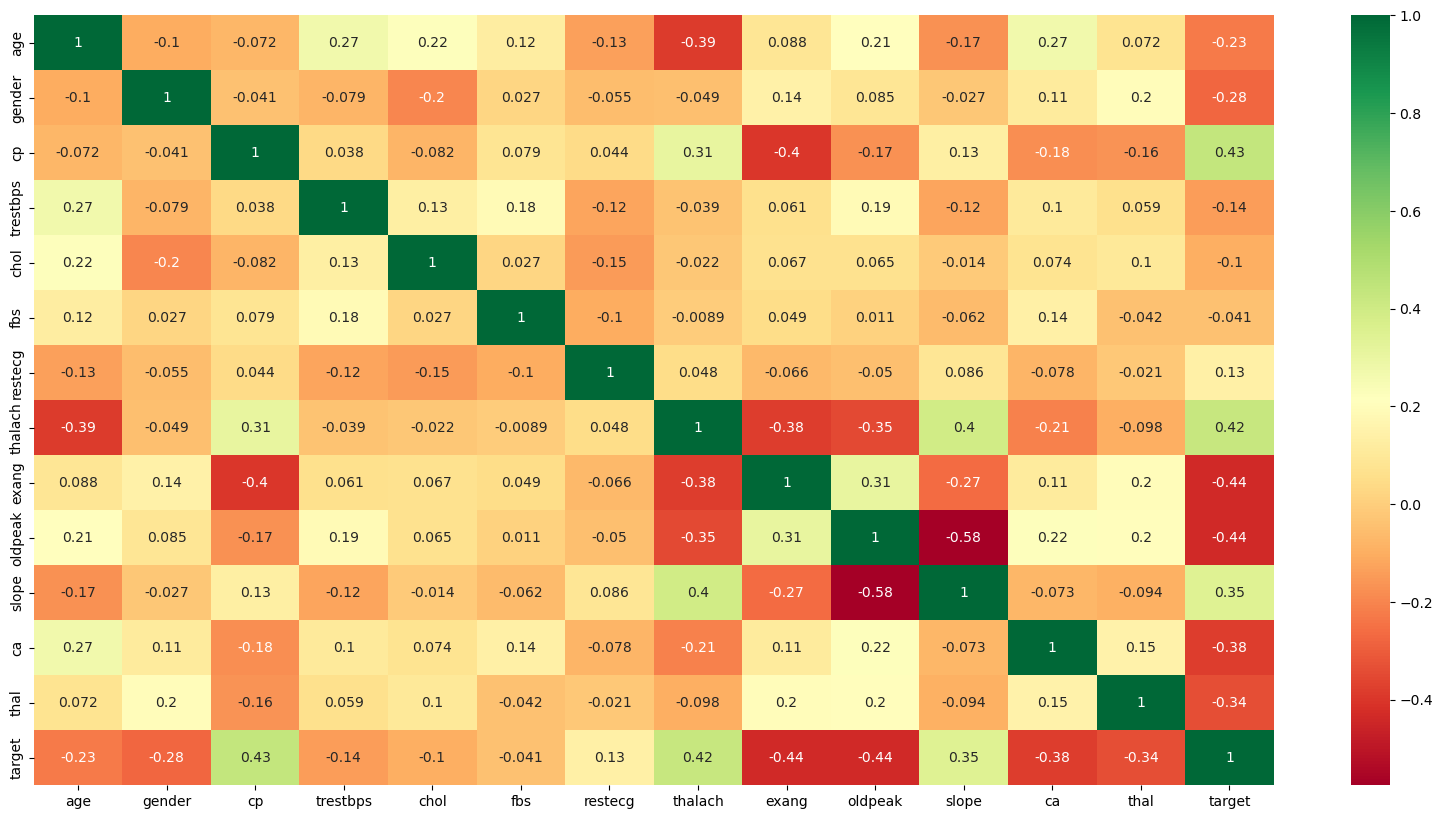

In [4]:
# Correlation heatmap
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20, 10))
g = sns.heatmap(df[top_corr_features].corr(), annot=True, cmap="RdYlGn")


<Axes: xlabel='target', ylabel='count'>

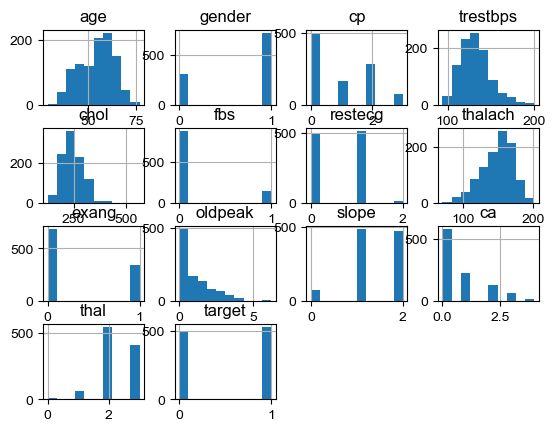

In [5]:
# Histograms and countplot
df.hist()
sns.set_style('whitegrid')
sns.countplot(x='target', data=df, palette='PuRd')

In [6]:
# Data preprocessing and feature scaling
dataset = pd.get_dummies(df, columns=['gender', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [7]:
# Splitting the dataset
y = dataset['target']
X = dataset.drop('target', axis=1)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [8]:
# Naive Bayes with Hyperparameter tuning
m1 = 'Naive Bayes'
nb = GaussianNB()
model = nb.fit(x_train, y_train)
nb_predict = nb.predict(x_test)
nb_conf_matrix = confusion_matrix(y_test, nb_predict)
nb_acc_score = accuracy_score(y_test, nb_predict)
print("Confusion Matrix for Naive Bayes:")
print(nb_conf_matrix)
print("\nAccuracy of Naive Bayes:", nb_acc_score * 100)
print("\nClassification Report:")
print(classification_report(y_test, nb_predict))

Confusion Matrix for Naive Bayes:
[[63 39]
 [ 9 94]]

Accuracy of Naive Bayes: 76.58536585365854

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.62      0.72       102
           1       0.71      0.91      0.80       103

    accuracy                           0.77       205
   macro avg       0.79      0.77      0.76       205
weighted avg       0.79      0.77      0.76       205



In [9]:
# K-Neighbors Classifier with Hyperparameter tuning
knn_score = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=10)
    knn_score.append(score.mean())

Text(0.5, 1.0, 'k Neighbors Classifier Scores for Different K-Values')

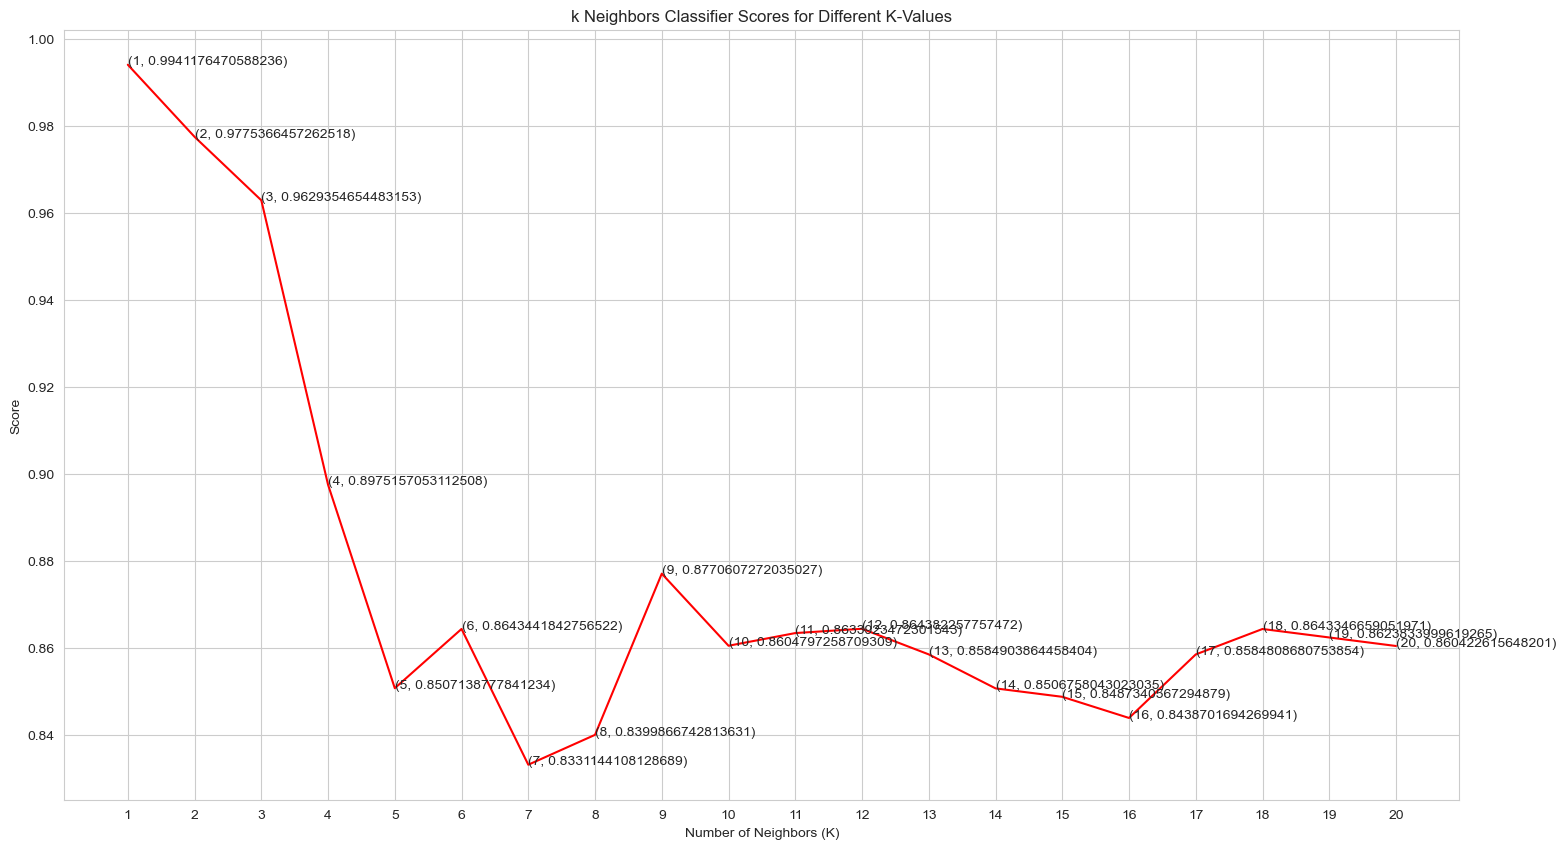

In [10]:
fig = plt.figure(figsize=(18, 10))
plt.plot([k for k in range(1, 21)], knn_score, color='red')
for i in range(1, 21):
    plt.text(i, knn_score[i - 1], (i, knn_score[i - 1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Score')
plt.title('k Neighbors Classifier Scores for Different K-Values')

In [11]:
best_k = knn_score.index(max(knn_score)) + 1
m2 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=best_k)
model = knn.fit(x_train, y_train)
knn_predict = knn.predict(x_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predict)
knn_acc_score = accuracy_score(y_test, knn_predict)
print("Confusion Matrix for K-Neighbors Classifier:")
print(knn_conf_matrix)
print("\nAccuracy of K-Neighbors Classifier:", knn_acc_score * 100)
print("\nClassification Report:")
print(classification_report(y_test, knn_predict))

Confusion Matrix for K-Neighbors Classifier:
[[102   0]
 [  3 100]]

Accuracy of K-Neighbors Classifier: 98.53658536585365

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [12]:
# Decision Tree Classifier with Hyperparameter tuning
dt_param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 11), 'random_state': [2]}
dt = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt, dt_param_grid, cv=10, scoring='accuracy')
dt_grid.fit(x_train, y_train)

best_criterion = dt_grid.best_params_['criterion']
best_max_depth = dt_grid.best_params_['max_depth']
best_random_state = dt_grid.best_params_['random_state']


In [13]:
best_dt = DecisionTreeClassifier(criterion=best_criterion, max_depth=best_max_depth, random_state=best_random_state)
best_dt.fit(x_train, y_train)

dt_predict = best_dt.predict(x_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predict)
dt_acc_score = accuracy_score(y_test, dt_predict)
print("\nBest Parameters for Decision Tree: ", dt_grid.best_params_)
print("\nConfusion Matrix for Decision Tree:")
print(dt_conf_matrix)
print("\nAccuracy of Decision Tree:", dt_acc_score * 100)
print("\nClassification Report:")
print(classification_report(y_test, dt_predict))


Best Parameters for Decision Tree:  {'criterion': 'entropy', 'max_depth': 10, 'random_state': 2}

Confusion Matrix for Decision Tree:
[[102   0]
 [  8  95]]

Accuracy of Decision Tree: 96.09756097560975

Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       102
           1       1.00      0.92      0.96       103

    accuracy                           0.96       205
   macro avg       0.96      0.96      0.96       205
weighted avg       0.96      0.96      0.96       205



In [14]:
# XGBoost for feature importance
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [15]:

# Get feature importances
feature_importances = xgb_model.get_booster().get_score(importance_type='weight')

In [16]:
# Create a DataFrame for visualization
imp_feature = pd.DataFrame(list(feature_importances.items()), columns=['feature', 'importance'])
imp_feature = imp_feature.sort_values(by='importance', ascending=True)  # Sort for horizontal bar chart

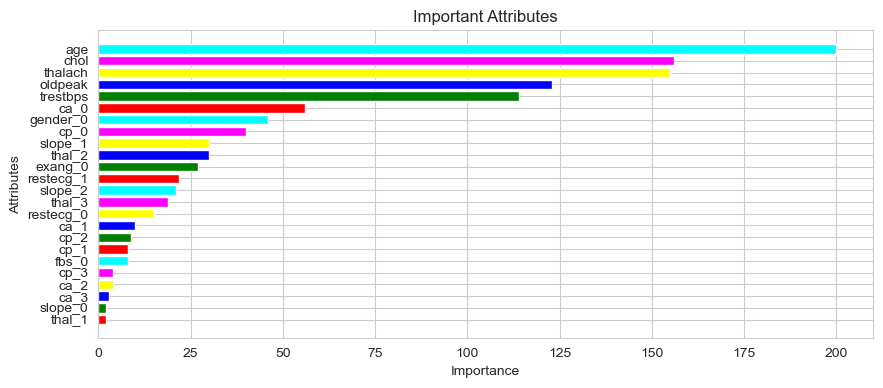

In [17]:
# Plot feature importances
fig = plt.figure(figsize=(10, 4))
colors = ["red", "green", "blue", "yellow", "magenta", "cyan"]
plt.title("Important Attributes")
plt.xlabel("Importance")
plt.ylabel("Attributes")
plt.barh(imp_feature['feature'], imp_feature['importance'], color=colors)
plt.show()

In [18]:
# Naive Bayes ROC Curve
nb_probs = nb.predict_proba(x_test)[:, 1]
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, nb_probs)
roc_auc_nb = auc(fpr_nb, tpr_nb)

In [19]:
# K-Neighbors Classifier ROC Curve
knn_probs = knn.predict_proba(x_test)[:, 1]
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, knn_probs)
roc_auc_knn = auc(fpr_knn, tpr_knn)

In [20]:
# Decision Tree Classifier ROC Curve
dt_probs = best_dt.predict_proba(x_test)[:, 1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, dt_probs)
roc_auc_dt = auc(fpr_dt, tpr_dt)

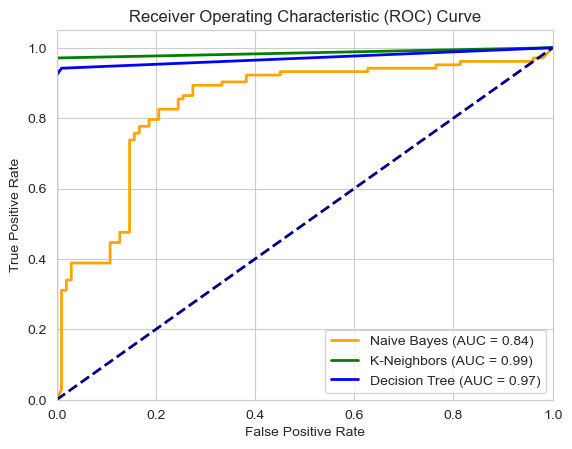

In [22]:
# Plot ROC curves for Naive Bayes, K-Neighbors Classifier, and Decision Tree Classifier
plt.plot(fpr_nb, tpr_nb, color='orange', lw=2, label=f'Naive Bayes (AUC = {roc_auc_nb:.2f})')
plt.plot(fpr_knn, tpr_knn, color='green', lw=2, label=f'K-Neighbors (AUC = {roc_auc_knn:.2f})')
plt.plot(fpr_dt, tpr_dt, color='blue', lw=2, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')

# Additional plot configurations
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
